# Modeling

![](presentation/house.gif)

## Preliminary thoughts:
### Datathon vs Research vs Industry Project

|Model for| low prediction error|explainable|robust|causal|maintainable|usability(prediction time, model size)|
|:-------------|:----------:|:----------:|:----------:|:----------:|:----------:|----------:|
|Datathon |Yes|-|-|-|-|-|
|Research|Yes|yes|yes|maybe|-|-|
|Industry Project| yes| yes|yes|maybe|yes|yes|

Datathon: 
   * Compare train and test data: are distribution identical, are there missing variables?
   * just optimize prediction error.
   * be aware: not necessarily the best model will win, but the model, that predicts the values on the test set best. (so it's also important to understand the test set)
   
Research:
    
   * (non machine learning research, applied modeling)  optimize prediction error, but also try to make model explainable, robust and, depending on the problem: causal.(prescriptive on top of predictive)   

Industry Project:
* Think about data for prediction: will it differ from training data, will it change over time?
optimize prediction error, but also try to make model explainable, maintainable (including easily retrainable), robust, fast prediction time, and, depending on the problem: causal.(prescriptive on top of predictive)


### We will need the following libraries:
(fat ones are necessary, the rest is optional)
* **tidyverse**
* **tidymodels**
* patchwork
* DataExplorer
* xgboost
* vip

In [2]:
knitr::opts_chunk$set(echo = TRUE, cache = F, message = F, warning = F, comment = F)

library(tidyverse)
library(tidymodels)
library(patchwork)
library(vip)

theme_set(theme_bw())

ncores <- 4

── Attaching packages ──────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ─────────────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.9      ✔ rsample      0.1.0 
✔ dials        0.0.10     ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.3 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.8 
✔ recipes      0.1.16     

── Conflicts ────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

### Data modeling lifecycle

![](presentation/cycle.gif)

* <span style='color:green'>**Import** - Reading in the data</span>
* <span style='color:green'> **Tidy** - Data cleaning</span>
* **Data transformation** - Feature engineering and Feature selection
* **Modeling** - Hyper parameter optimization, Model evaluation
* <span style='color:red'>*Visualization* </span>
* <span style='color:red'>*Communication*</span>

## TidyModels
https://www.tidymodels.org/packages/   

The tidymodels framework is a collection of packages for modeling and machine learning using **tidyverse principles.**   
Here is a selection of packages we will use:


| | |
|:-------------|:-------------|
|<img src="presentation/rsample.png" alt="https://rsample.tidymodels.org/" width="100"/>|With the functions from the rsamples package, we split our data into different folds for 5-fold cross validation|
|<img src="presentation/recipes.png" alt="https://recipes.tidymodels.org/" width="100"/> |We will use the Recipes package to transform the data. It creates a data transformation recipe, that can be applied to various datasets.|
|<img src="presentation/parsnip.png" alt="https://parsnip.tidymodels.org/" width="100"/>|We use the parsnip package to define our models|
|<img src="presentation/workflows.png" alt="https://workflows.tidymodels.org/" width="100"/>|The workflow package creates a workflow for us, it defines the model and the data transformation we want to use|
|<img src="presentation/tune.png" alt="https://tune.tidymodels.org/" width="100"/>|The tune package can be used to tune the hyperparameters of the model (for example the number of trees, if we use a random forrest, or the maximum size of a tree)|
|<img src="presentation/dials.png" alt="https://dials.tidymodels.org/" width="100"/>|.. and the dials package creates and manages tuning parameters and parameter grids.|
|<img src="presentation/yardstick.png" alt="https://yardstick.tidymodels.org/" width="100"/>|The yardstick package provides us with functions to evaluate the performance of our model|

## Import - reading the data

In [3]:
trainval_data <- read_csv("data/train.csv")
test_data <- read_csv("data/test.csv")

Rows: 1460 Columns: 81

── Column specification ─────────────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1459 Columns: 80

── Column specification ─────────────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (37): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
names(trainval_data)


[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "1stFlrSF"     
[45] "2ndFlrSF"      "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "3SsnPorch"     "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

![](presentation/cycle.gif)

## Tidy - data cleaning
Clean the data set

#### Quick overview of independent variables / features

[1] Alley       FireplaceQu PoolQC      Fence       MiscFeature
81 Levels: PoolQC MiscFeature Alley Fence FireplaceQu ... SalePrice

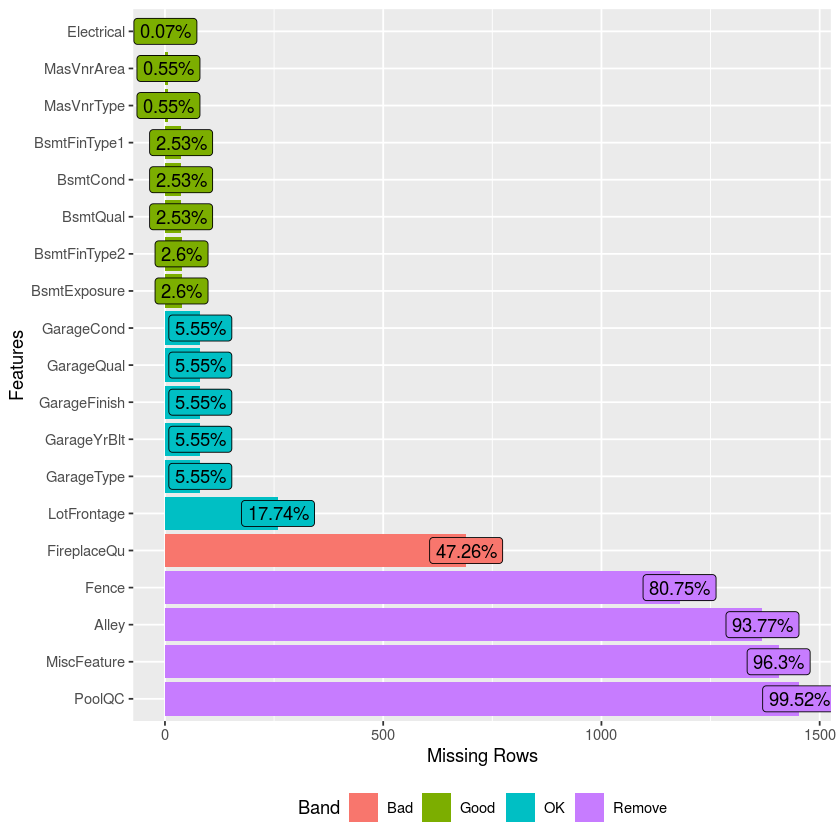

In [5]:
p <- DataExplorer::plot_missing(trainval_data, missing_only = T)
cols_to_remove <- p$data %>% filter(Band %in% c("Remove", "Bad")) %>% pull(feature)
cols_to_remove

##### Fill in known NAs

In [6]:
data <- bind_rows(
    trainval = trainval_data,
    test = test_data,
    .id = "source"
)


In [7]:
data <- data %>% replace_na(list(Alley = "No Alley Access", 
                        BsmtQual = "No Basement", 
                        BsmtCond = 'No Basement',
                       BsmtExposure = "No Basement",
                       BsmtFinType1 = "No Basement",
                       BsmtFinType2 = "No Basement",
                       FireplaceQu = "No Fireplace",
                       GarageType = "No Garage",
                       GarageFinish = "No Garage",
                       GarageQual = "No Garage",
                       GarageCond = "No Garage",
                       PoolQC = "No Pool",
                       Fence = "No Fence",
                       MiscFeature = "None"
                       ))
trainval_data <- data[data$source=='trainval',]%>%select(-source)
test_data <- data[data$source=='test',]%>%select(-source)


factor(0)
81 Levels: LotFrontage GarageYrBlt MasVnrType MasVnrArea Electrical ... SalePrice

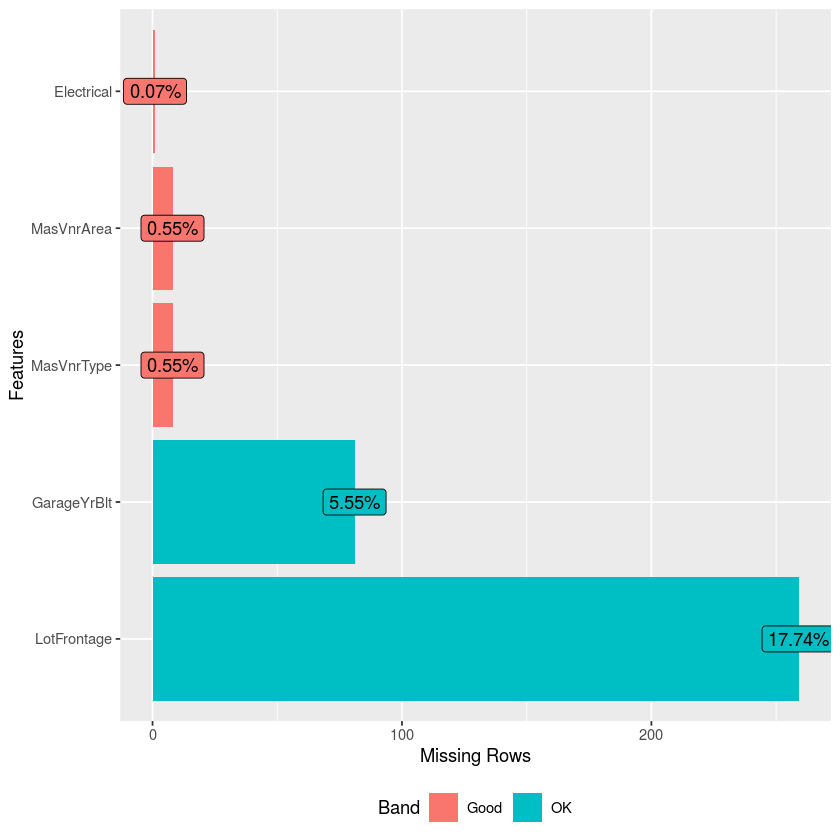

In [8]:
p <- DataExplorer::plot_missing(trainval_data, missing_only = T)
cols_to_remove <- p$data %>% filter(Band %in% c("Remove", "Bad")) %>% pull(feature)
cols_to_remove

### Exploratory Data Analysis - Understanding the data + feature engineering

Feature engineering (and feature selection) are often the most important parts in the modeling process.   

* What do the features (variables) mean? 
* What other feature could be useful and can be created from the features you have? 

##### The target variable: Price

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



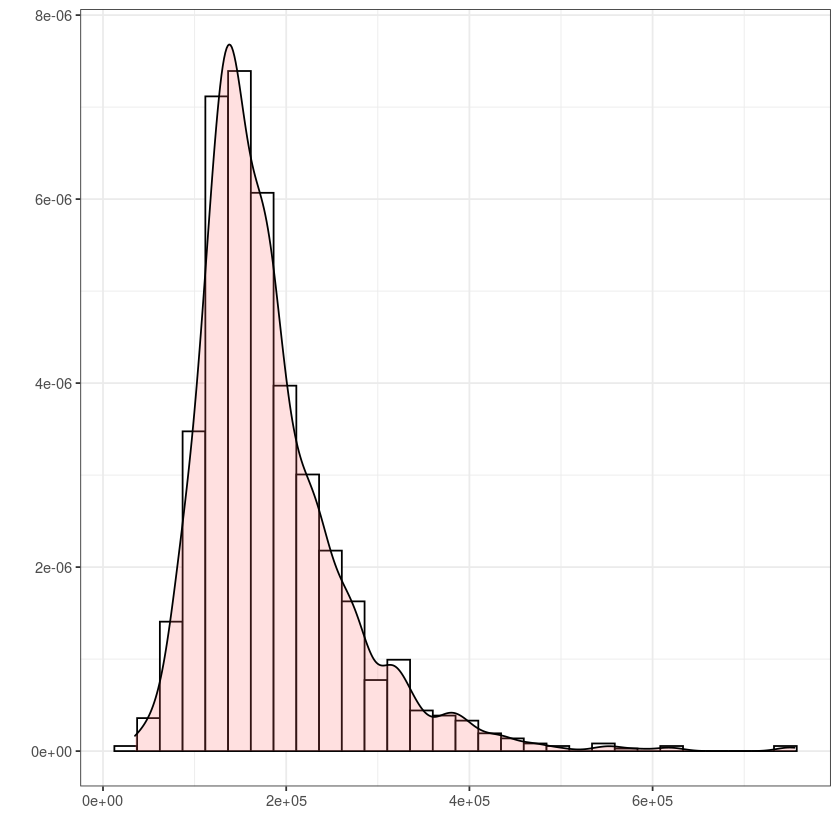

In [9]:
ggplot(trainval_data, aes(x=SalePrice)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666")+ 
  labs(x = "", y = "")


here: prices are strictly positive (above zero).
Should a house be twice as expensive, if it's twice as large?

If the dependence on our variables is multiplicative (i.e. the price doubles, when the size doubles, a bathroom increases the price of the house by a certain percentage, i.e the absolute increase is higher for an expensive house, than for a cheap house), then we want to use log-linear regression, or poisson regression.

**Example1:**  
$Y = a_1 X_1 + a_2 X_2 + a_3 X_3 + ... + a_n X_n$ - features are additive    
$log(Y) = b_1 log(X_1) + b_2 log(X_2) + b_3 log(X_3)+ ... + b_n log(X_n)$ - features are multiplicative!

by using a log-transformation on your (numerical) features, you can change how they influence the model outcome.

**New Target variable: Log (SalePrice)**   
dependent variables will be transformed later..

In [10]:
trainval_data <- trainval_data %>% mutate(logSalePrice = log(SalePrice))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



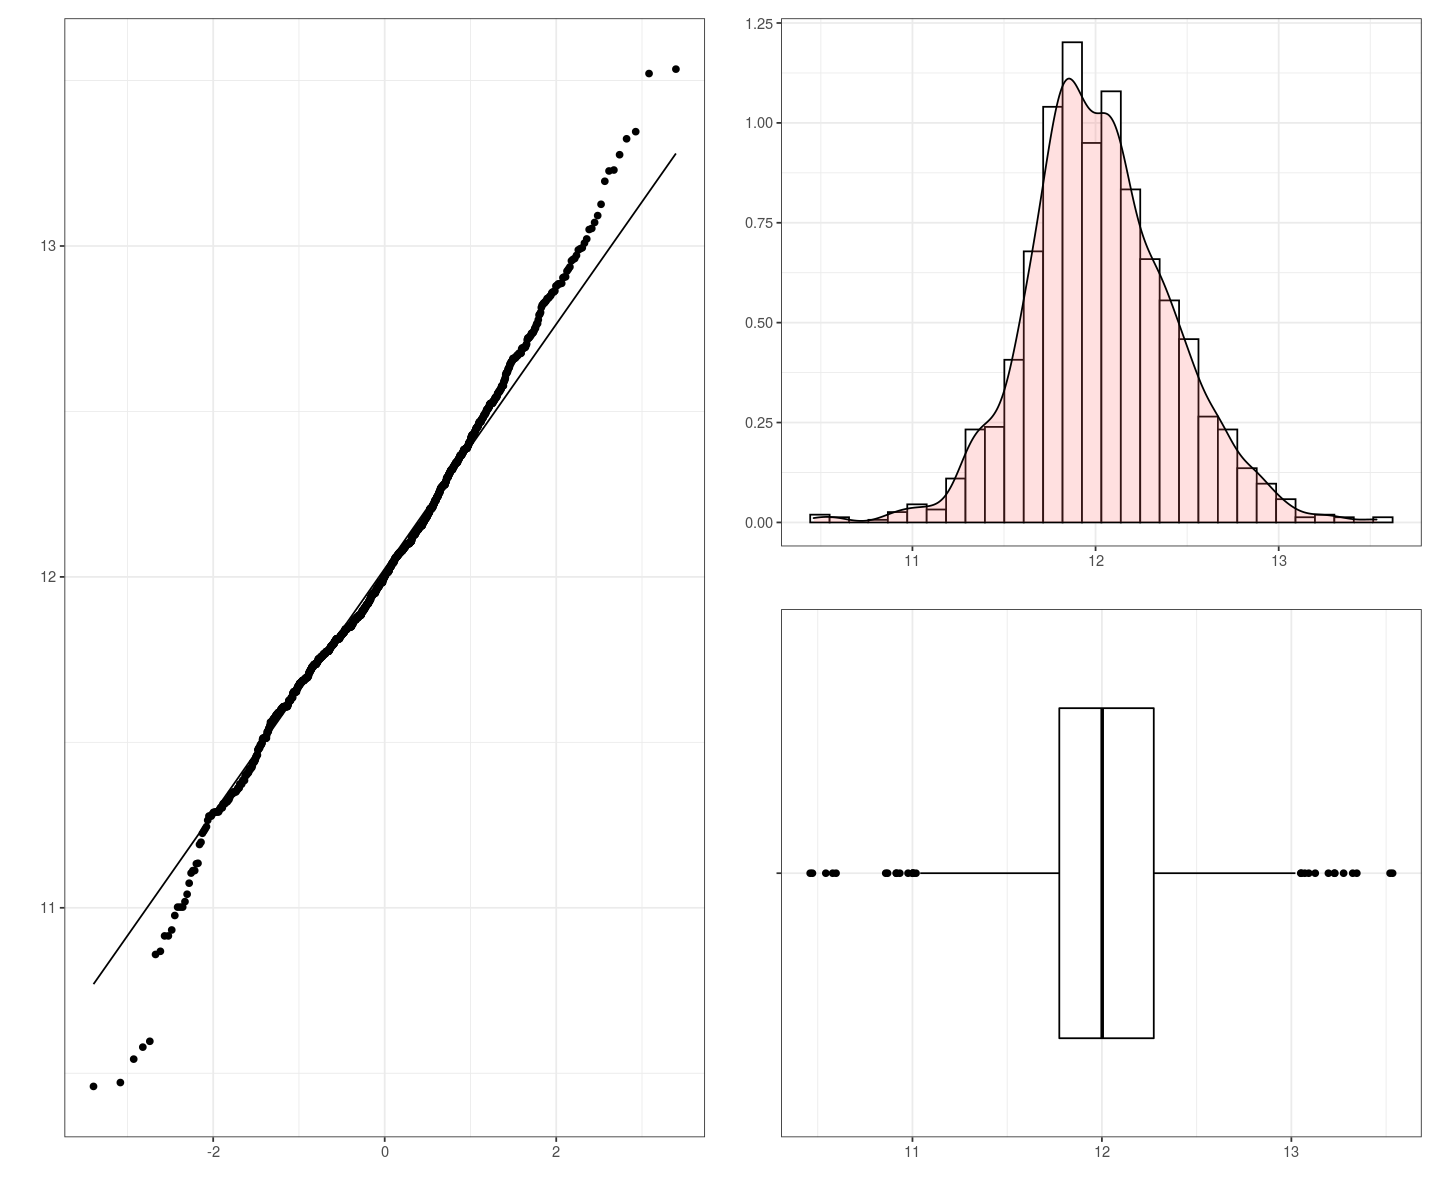

In [46]:

# hist
g1 <- ggplot(trainval_data, aes(x=logSalePrice)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666")+ 
  labs(x = "", y = "")

# boxplot
g2 <- ggplot(trainval_data, aes(y=logSalePrice)) + 
 geom_boxplot(aes(x=""), colour="black", fill="white")+
  coord_flip()+ 
  labs(x = "", y = "")

# qqplot
g3 <- ggplot(trainval_data, aes(sample = logSalePrice))+ 
  stat_qq()+
  stat_qq_line()+ 
  labs(x = "", y = "")
  
g3 | g1 / g2 

#### Some ideas for creating new features

|transformation|example|
|:------|:------|
|non-linear transform|example: log-transform on both target and features, if features are multiplicative rather than additive. Only on features, if the target depends logarithmically on the feature|
|indicator function| if a feature is present or not, i.e. if we're only interested if the house has a kitchen, but not how many, or the increase in the number of kitchens is not important|
|f(feature1, feature2)| if two features interact, we can create a new feature from the interaction, for example: the average number of squarefeet per room :   number of rooms/total living surface|
|binning| if we are not interested in a very fine grained information, we can bin the data, for example, the age of the house in steps of 20 years|
|decorrelations|if variables are highly correlated, we can think about decorrelating them, either by using PCA (and variable reduction) or by creating variables that are less correlated |

#### Correlations

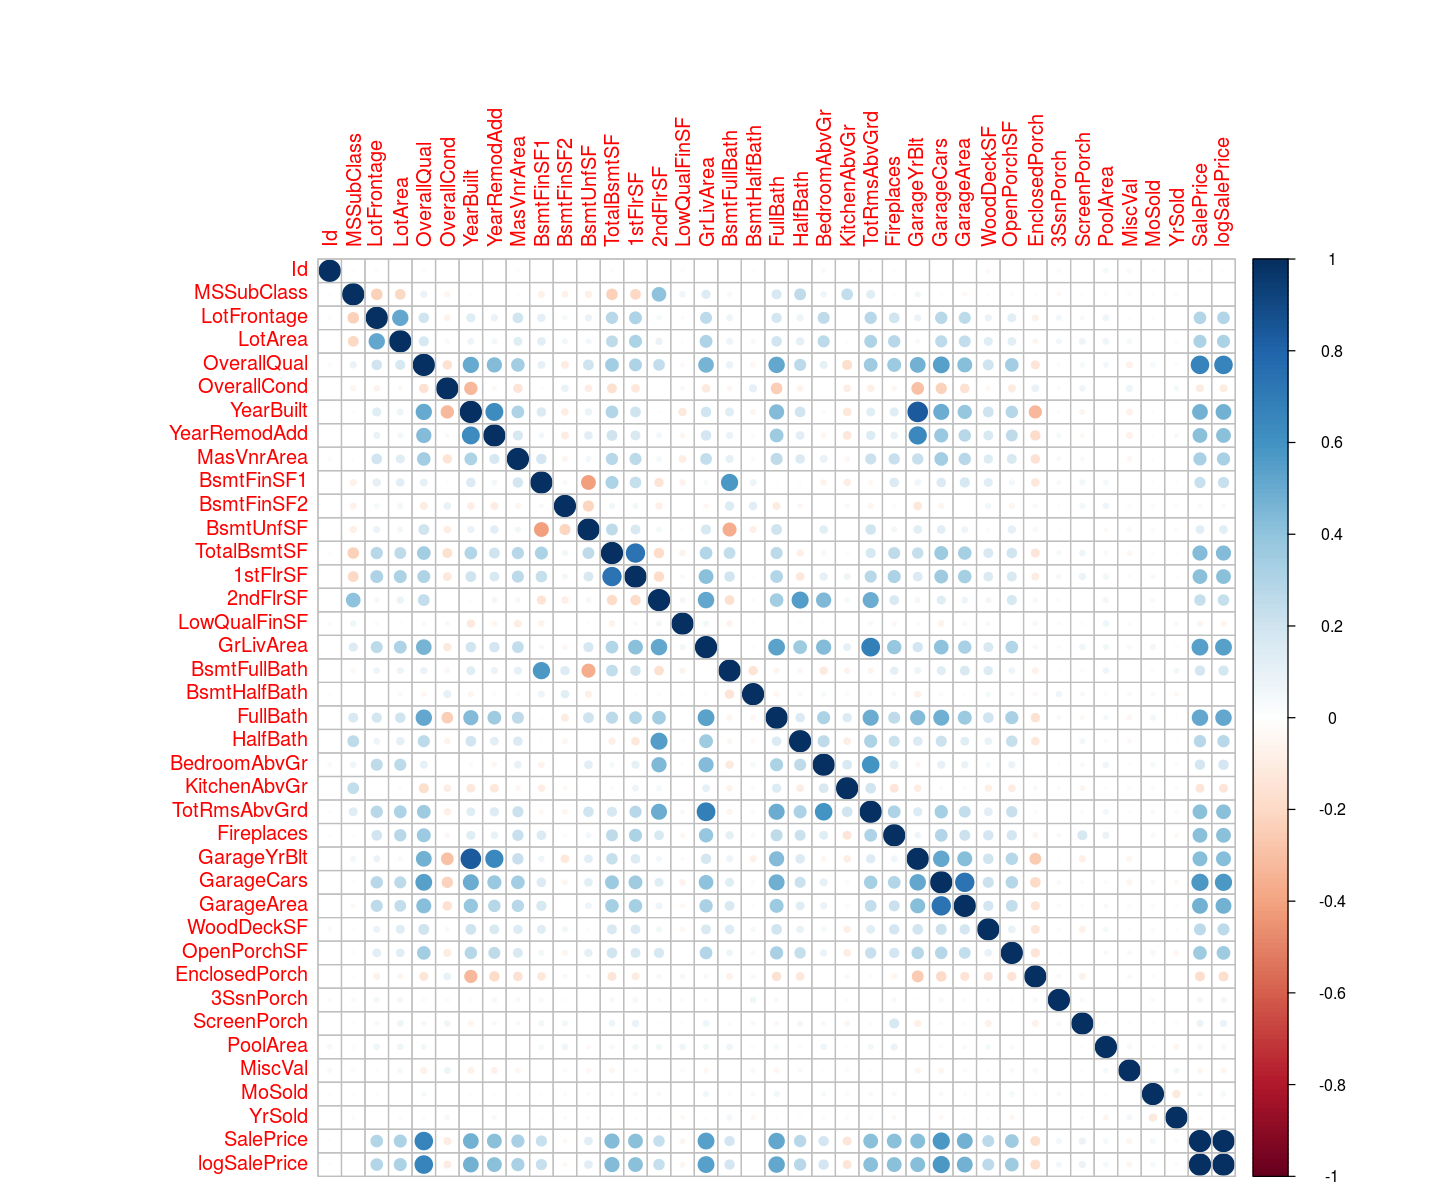

In [12]:
options(repr.plot.width=12, repr.plot.height=10)
corrplot::corrplot(cor(trainval_data %>% select(where(is.numeric)), method="kendall", use = "pairwise.complete.obs"))


### Outliers
especially if we use models that are not robust, like linear regression, outliers can severly skew our results. Sometimes it can be good, to remove outliers from the data before training the model.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



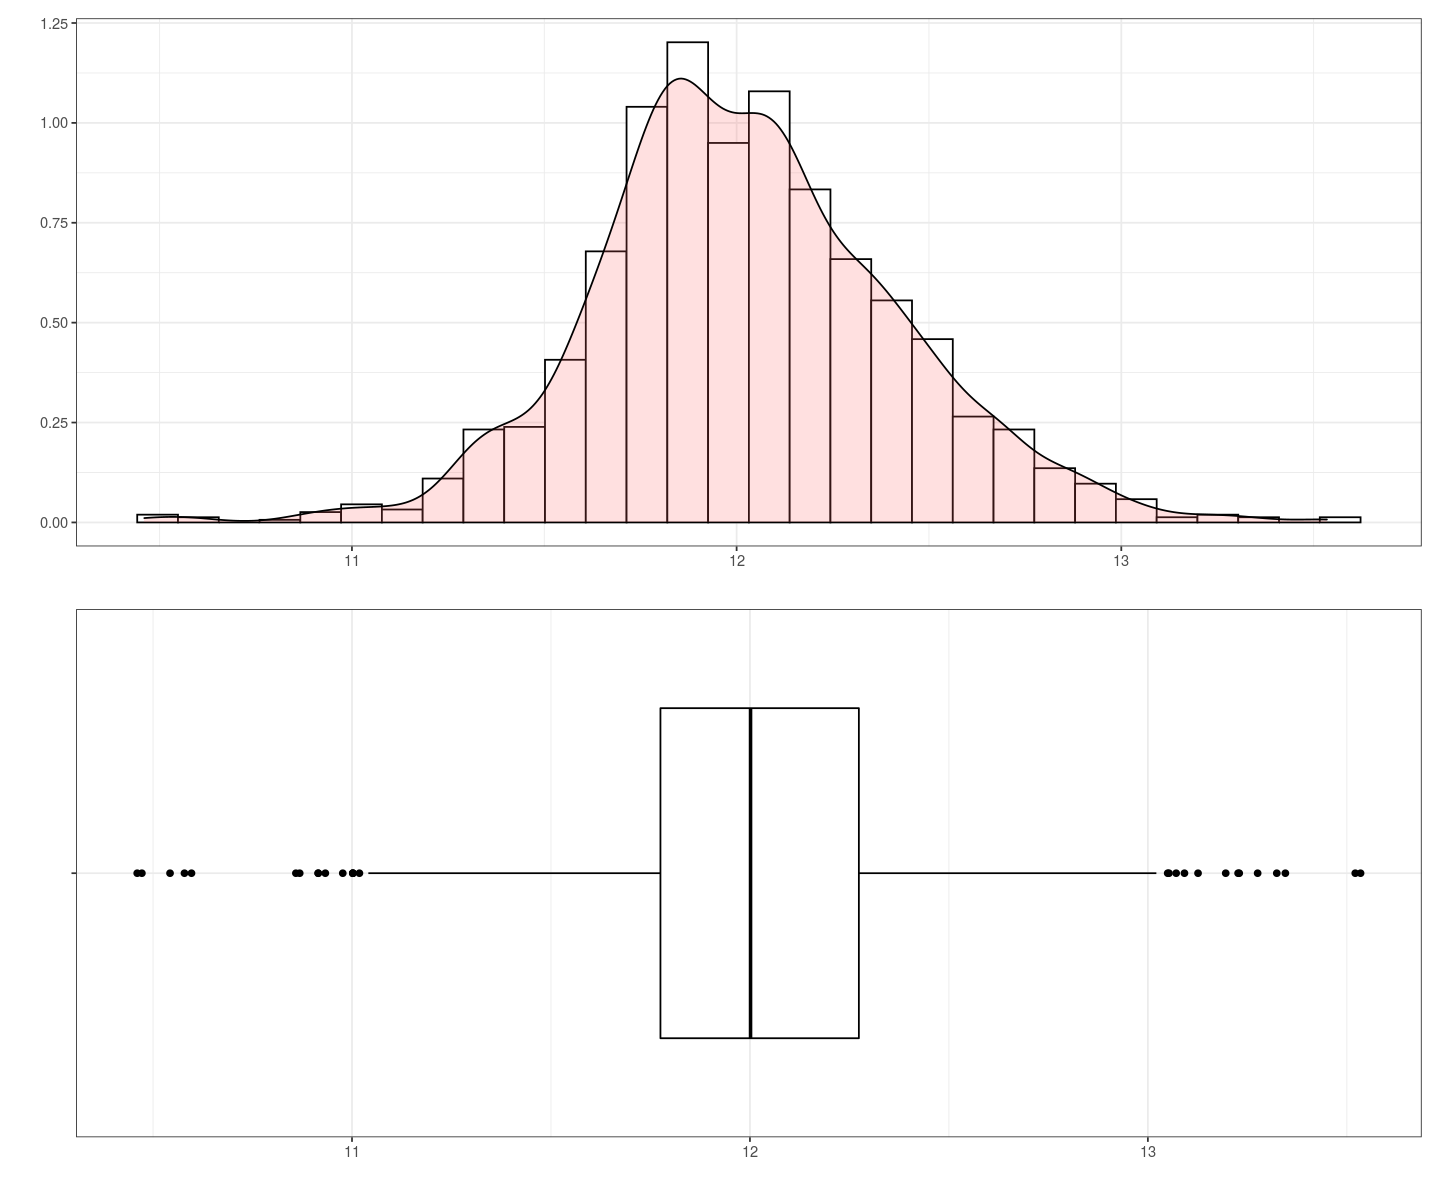

In [47]:
 g1 / g2

In [13]:
out <- boxplot.stats(trainval_data$logSalePrice)$out
out_ind <- which(trainval_data$logSalePrice %in% c(out))
print(trainval_data[out_ind,c('SalePrice','Alley','LotArea','PoolArea','MiscFeature')])

# A tibble: 28 x 5
   SalePrice Alley           LotArea PoolArea MiscFeature
       <dbl> <chr>             <dbl>    <dbl> <chr>      
 1     40000 Pave               8500        0 None       
 2    501837 No Alley Access   17423        0 None       
 3    475000 No Alley Access   22950        0 None       
 4     61000 No Alley Access   10020        0 None       
 5     60000 No Alley Access    9571        0 None       
 6    555000 No Alley Access   15431        0 None       
 7     34900 No Alley Access    7879        0 None       
 8     39300 No Alley Access    5000        0 None       
 9     60000 No Alley Access    6120        0 None       
10    755000 No Alley Access   21535        0 None       
# … with 18 more rows


you may also want to look at outliers in the features.

### Modeling pipeline

![](presentation/traintestsplit.png)

##### splitting the data into train and validation set and using cross validation.
| | |
|:-------------|:-------------|
|<img src="presentation/rsample.png" alt="https://rsample.tidymodels.org/" width="100"/>|With the functions from the rsamples package, we split our data into different folds for 5-fold cross validation. We can split it in such a way, that in all folds, the distribution of our target variable is identical.|

### Train- Validation - Test split
In order to be able to evaluate your model quality, you need a train and a validation set.
You train the model on the training set and evaluate it on the evaluation set.
We split our training data, so that 80% of it will be the training set, and 20% the validation set.


In [48]:
set.seed(24)
data_split <- initial_split(trainval_data, prop = 4/5, strata = 'logSalePrice', breaks = 10,)
train_data <- training(data_split)
val_data <- testing(data_split)


In [15]:
cat('train+validation data size is:',dim(trainval_data),'\n')
cat('train data size is:',dim(train_data),'\n')
cat('validation data size is:',dim(val_data),'\n')
cat('test data size is:',dim(test_data))

train+validation data size is: 1460 82 
train data size is: 1165 82 
validation data size is: 295 82 
test data size is: 1459 81

#### data preparation for cross validation
![](presentation/cv.jpg)

In [16]:
set.seed(42)
SalePrice_vfold <- vfold_cv(train_data, v = 5, strata = SalePrice)

## Let's start with recipes..
|||
|:-------------|:-------------|
|<img src="presentation/recipes.png" alt="https://recipes.tidymodels.org/" width="100"/> |We will use the Recipes package to transform the data. It creates a data transformation recipe, that can be applied to various datasets. A Recipes is an instruction how to change a dataset. It can be applied to the training data before modeling,or to the test data before prediction|

|recipe|pipeable sequences of feature engineering steps to get your data ready for modeling|
|:-----|:-----|
|update_role|update the role of the independent variables (predictor or identifier: identifiers are not used for prediction)|
|step_rm|removes columns from dataframe|
|step_unknown|Assign missing categories to "unknown" (or a name of your choice)|
|step_log|Logarithmic Transformation|
|step_normalize|all numeric variables are normalized|
|step_other|factors are grouped together to the "other" class, if they are less frequent than the threshold|
|step_novel|if previously unseen factors are encounter, they are assigned to the "new" level|
|step_impute_knn|missing values are imputed with the k-next neighbor algorithm|
|step_dummy|ategorical variables are one-hot encoded|
|step_nzv|variables with near zero variance are removed|

There are many more options, get all information here: https://recipes.tidymodels.org/reference/index.html

In [17]:
SalePrice_recipe <- recipe(train_data, logSalePrice ~ .) %>% # set the target(dependent) and the feature (independent) variables
                    update_role(Id, new_role = "ID") %>% #update the role of the independent variables (predictor or identifier)
                    step_rm(Id, SalePrice) %>% 
                    step_rm(cols_to_remove) %>%
#                   step_unknown(c('BsmtQual','BsmtCond'), new_level='No Basement')%>%
                    step_log(all_numeric(),-all_outcomes(), offset = 1) %>% # transforms all numeric variables logarithmically
                    step_normalize(all_numeric(),-all_outcomes()) %>% #all numeric variables are normalized
                    step_other(all_nominal(), -all_outcomes(), threshold = 0.01) %>% #factors are grouped together to the "other" class, if they are less frequent than the threshold
                    step_novel(all_predictors(), -all_numeric()) %>% #if previously unseen factors are encounter, they are given the "new" level.
                    step_impute_knn(all_predictors()) %>% #missing values are imputed with the k-next neighbor algorithm
                    step_nzv(all_predictors(), freq_cut=995/5)%>% # variables with near zero variance are removed.
                    step_dummy(all_nominal(), -all_outcomes())

##### Think about: 
for which columns does knn - imputation make sense? How should the other columns be imputed?

#### The recipe can be 'trained' on one dataset ...
with the prep() method

In [18]:
SalePrice_recipe2 <- prep(SalePrice_recipe, training=train_data)

tidy(SalePrice_recipe)
tidy(SalePrice_recipe2)


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(cols_to_remove)` instead of `cols_to_remove` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



number operation type       trained skip  id              
1 1      step      rm         FALSE   FALSE rm_XMBSP        
2 2      step      rm         FALSE   FALSE rm_dex5l        
3 3      step      log        FALSE   FALSE log_9KhLu       
4 4      step      normalize  FALSE   FALSE normalize_eBkTV 
5 5      step      other      FALSE   FALSE other_QKTAI     
6 6      step      novel      FALSE   FALSE novel_EXG5i     
7 7      step      impute_knn FALSE   FALSE impute_knn_PpuSA
8 8      step      nzv        FALSE   FALSE nzv_w2ycB       
9 9      step      dummy      FALSE   FALSE dummy_EUsSZ

number operation type       trained skip  id              
1 1      step      rm         TRUE    FALSE rm_XMBSP        
2 2      step      rm         TRUE    FALSE rm_dex5l        
3 3      step      log        TRUE    FALSE log_9KhLu       
4 4      step      normalize  TRUE    FALSE normalize_eBkTV 
5 5      step      other      TRUE    FALSE other_QKTAI     
6 6      step      novel      TRUE    FALSE novel_EXG5i     
7 7      step      impute_knn TRUE    FALSE impute_knn_PpuSA
8 8      step      nzv        TRUE    FALSE nzv_w2ycB       
9 9      step      dummy      TRUE    FALSE dummy_EUsSZ

#### ...and applied to another dataset
with the bake() method

In [19]:
bake(SalePrice_recipe2, train_data)

MSSubClass   LotFrontage LotArea     OverallQual OverallCond YearBuilt   
1     0.990020275  0.24379616  0.3376408  -1.61240055 -0.4607691  -0.132786718
2    -0.568372527 -0.26654394 -0.6657421  -1.61240055  0.4374826  -1.460754849
3     0.630867804 -0.77535704 -0.1104797  -1.61240055 -1.5231754  -1.695979025
4     0.990020275 -0.04266716 -0.7520163  -1.61240055 -0.4607691  -0.528321746
5     0.729351187 -0.26654394 -0.4221526  -0.72513429  1.2155836  -1.695979025
6    -0.568372527 -0.94763800 -1.2601137  -1.61240055  0.4374826  -0.859792362
7     1.985133035 -3.16466569 -3.2505297  -1.61240055 -0.4607691   0.064077287
8     0.152072990  1.30371688 -0.1171187  -2.69832669 -4.4998083  -1.864521668
9    -1.131985398  0.70952702 -0.1104797  -0.72513429 -2.8234556  -0.330251835
10   -1.131985398  0.28246023  0.3601274  -1.61240055 -0.4607691  -0.198541452
11   -0.568372527 -0.26654394  0.3392062  -1.61240055  1.2155836  -2.885107430
12    0.152072990 -0.77535704 -0.7458092  -1.61240055 -0.4607691  -1.059493320
13    0.002750206 -0.50957791 -1.3519636  -0.72513429  1.2155836  -1.360205812
14   -0.568372527 -0.72017539 -0.7273101  -0.72513429  1.2155836  -1.326724178
15    0.152072990 -0.26654394  0.1180366   0.02503864 -0.4607691  -1.561460463
16    0.002750206 -0.50957791 -0.9278676  -1.61240055  0.4374826  -0.495267937
17   -0.568372527 -0.26654394 -0.1060667  -0.72513429  0.4374826  -1.595063881
18    0.729351187  0.93190141 -0.9210522   0.02503864  0.4374826  -1.965858501
19   -0.568372527  0.04216796 -0.8926950  -0.72513429  0.4374826  -1.527874497
20    1.815682704 -3.16466569 -2.9541665   0.02503864  0.4374826  -0.034279805
21    1.815682704 -3.16466569 -3.1542620   0.02503864 -0.4607691   0.031308208
22    1.815682704 -3.16466569 -3.1542620   0.02503864 -2.8234556  -0.001477484
23    0.152072990 -0.13011300 -1.1068218  -0.72513429 -1.5231754  -2.372801274
24   -0.568372527 -0.50957791 -0.9797864  -2.69832669 -4.4998083  -1.026166973
25   -1.131985398  0.16485315  0.6438098  -0.72513429 -0.4607691  -0.495267937
26    0.152072990  0.35779639 -0.2431880   0.02503864  1.2155836  -1.695979025
27   -0.568372527  0.43984691  0.5898202  -1.61240055 -0.4607691  -1.026166973
28    0.002750206 -0.77535704 -1.1068218  -0.72513429  0.4374826  -0.992857791
29    0.630867804 -0.26654394 -0.6427248  -0.72513429 -0.4607691  -1.695979025
30   -1.131985398 -0.26654394 -0.1327016  -1.61240055 -1.5231754  -0.693844682
⋮    ⋮            ⋮           ⋮           ⋮           ⋮           ⋮           
1136  0.4111821    1.05157238  0.42551738 1.760794    -0.4607691   1.2006580  
1137  0.4111821    0.53931054  0.82651721 0.674868    -0.4607691   0.8132193  
1138  0.4111821    1.10956961  0.57668975 1.248058    -0.4607691   0.7484199  
1139 -1.1319854    1.35683554  0.43446320 1.248058    -0.4607691   1.0717695  
1140  0.4111821    0.43206138  0.18810694 1.248058    -0.4607691   1.1362458  
1141  0.4111821    1.63246482  2.58753171 2.224620    -0.4607691   0.7808277  
1142  0.1520730    0.70952702  0.31787353 1.248058    -0.4607691   0.6835555  
1143  1.4023574   -0.08605374 -0.89839951 1.248058    -0.4607691   1.2006580  
1144  0.4111821    2.49147618  1.03249041 2.224620    -0.4607691   0.8132193  
1145 -1.1319854    0.70952702  0.22855880 1.248058    -0.4607691   1.1362458  
1146  1.4023574   -0.04266716 -0.05197569 1.760794    -0.4607691   1.2006580  
1147 -1.1319854    1.35683554  0.81183981 2.224620    -0.4607691   1.1362458  
1148 -1.1319854    0.90117932  0.86672512 1.248058    -0.4607691   0.7484199  
1149 -1.1319854    0.83872042  0.71801601 1.760794    -0.4607691   1.2006580  
1150  0.1520730    0.83325294  0.83988255 1.248058     2.5158639  -1.1929707  
1151  0.4111821    0.74238016  0.38472531 1.248058    -0.4607691   1.1362458  
1152  0.4111821    0.93190141  0.21708977 1.248058    -0.4607691   0.7484199  
1153 -1.1319854    1.16640681  1.24554425 0.674868     1.9019174  -0.3962078  
1154  0.4111821    0.74983837  0.11255175 1.248058    -

<style>
table {float:left}
</style>
## Modeling
| | |
|:-------------|:-------------|
|<img src="presentation/parsnip.png" alt="https://parsnip.tidymodels.org/" width="100"/>|We use the parsnip package to define our models|

Here we will use Lasso, but there are other models you can use as well. Have a look here:
https://parsnip.tidymodels.org/reference/index.html 

### Lasso Model


regularized linear regression   

![](presentation/lasso.jpg)

get information on linear regression models here: https://parsnip.tidymodels.org/reference/linear_reg.html   
and for this one in particular here: https://parsnip.tidymodels.org/reference/details_linear_reg_glmnet.html


In [20]:
Lasso_model <- 
linear_reg( mixture=1,     #here we specify that we want a Lasso model, with L1 regularization. 
           penalty=tune()) %>% #the penalty will be specified by tuning the model
  set_engine("glmnet")%>% 
  translate()

## Modeling Workflow
we add a model and a data transformation recipe to our workflow.   
Then, we can fit the model together with the transformed data using the workflow.

| | |
|:-------------|:-------------|
|<img src="presentation/workflows.png" alt="https://workflows.tidymodels.org/" width="100"/>|The workflow package creates a workflow for us, it defines the model and the data transformation we want to use,|

In [21]:
Workflow_SalePrice_lasso <- 
  workflow() %>% 
  add_model(Lasso_model) %>% 
  add_recipe(SalePrice_recipe)

## Hyperparameter tuning
| | ||
|:-------|:--------|------:|
|<img src="presentation/tune.png" alt="https://tune.tidymodels.org/" width="100"/>|The tune package can be used to tune the hyperparameters of the model (for example the number of trees, if we use a random forrest, the learning rate or the maximum depth of a tree)and the dials package creates and manages tuning parameters and parameter grids|<img src="presentation/dials.png" alt="https://tune.tidymodels.org/" width="100"/>|

* select a set of hyper parameters to explore. 
    We use the dials package, which provides us with default values, that we can also adjust.   
    Have a look here:
    https://dials.tidymodels.org/reference  
* tune the hyperparameters. For example with **grid search** or **bayesian optimization**.   
  These algorithms use 5-fold cross validation to choose the hyperparameters for which the model performs best (across all folds).   

* look at the optimal hyper parameter values. If they happen to be at the border of our parameter range, it might be good to extend the range and repeat the hyperparameter tuning.

### Grid Search
we define a grid of parameters. Each parameter combination will be used to fit a model.   
For a small set of parameters that is a good option, for a large set, it is very impractical..


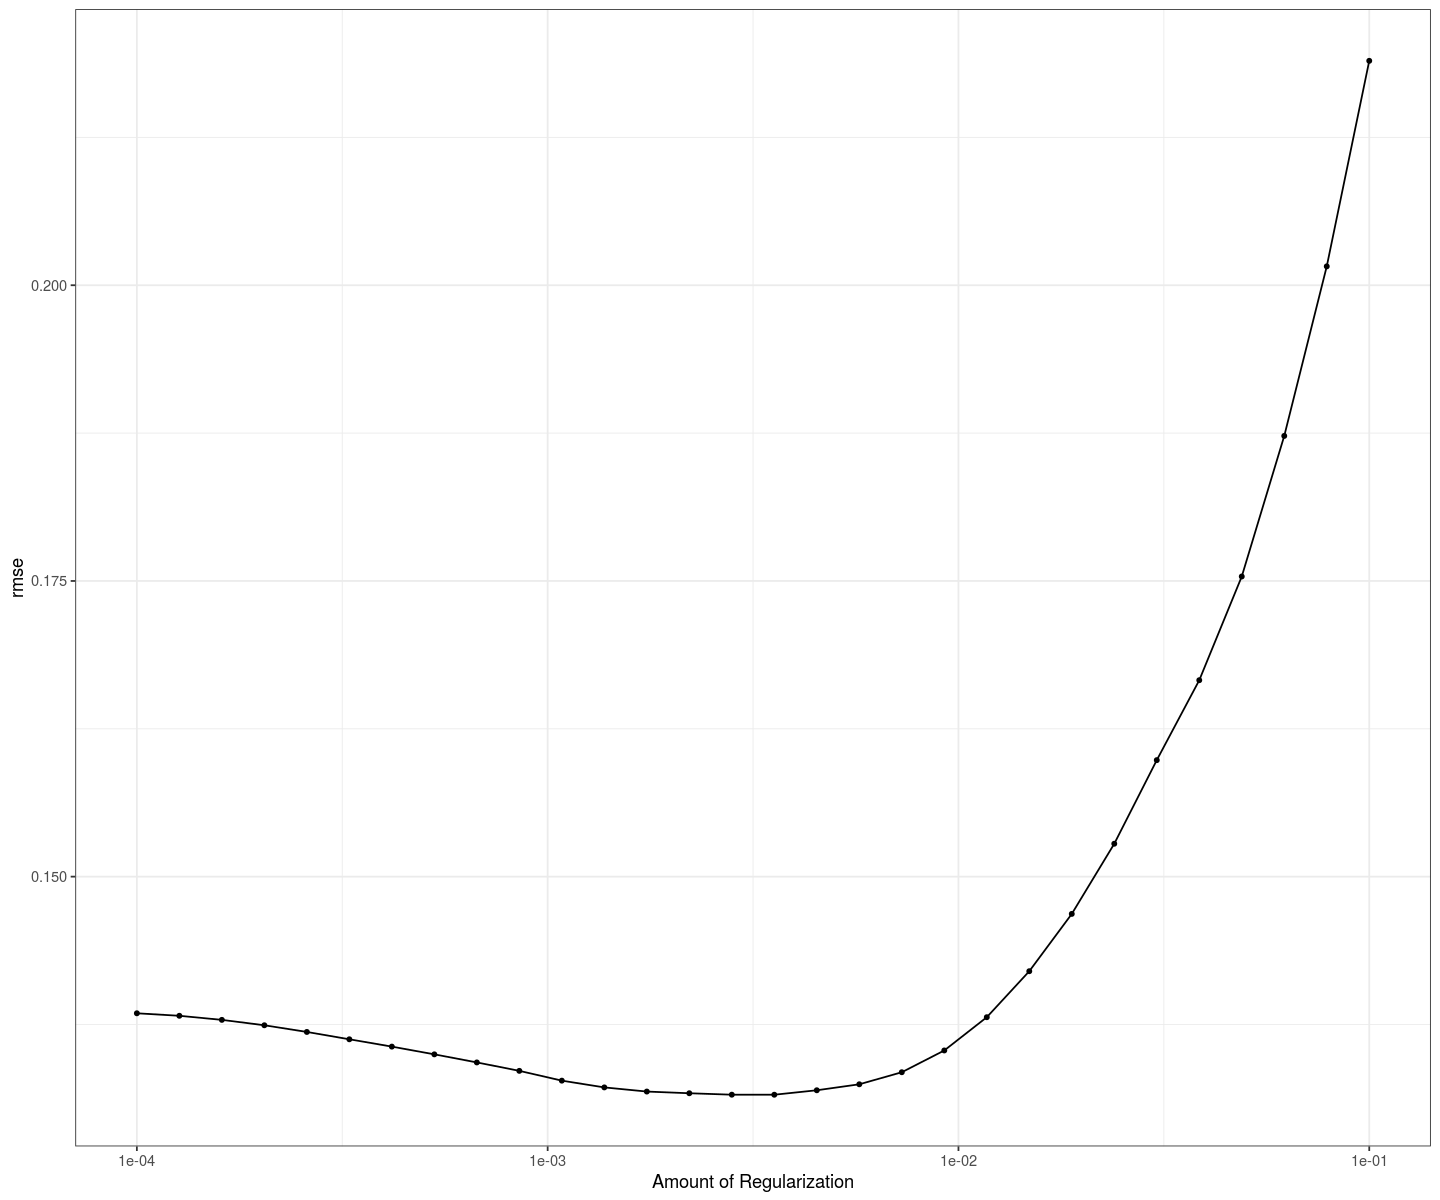

In [22]:
parameter_grid <- tibble(penalty = 10^seq(-4, -1, length.out = 30)) #setting the range for the parameter we want to explore

lasso_tune_grid <- 
  Workflow_SalePrice_lasso %>% 
  tune_grid(SalePrice_vfold,
            grid = parameter_grid,
            control = control_grid(save_pred = TRUE),
            metrics = metric_set(rmse))
autoplot(lasso_tune_grid)

### Bayesian Optimization
(https://en.wikipedia.org/wiki/Bayesian_optimization).   
At each iteration step the most promising set of parameters for improving the model is chosen.  
Uses e a mixture of:   
   * exploitation (knowing which parameters worked well in the past) and 
   * exploration (choosing areas in the parameter space, that have not been explored yet).


In [23]:
set.seed(42)

lasso_params <-parameters(penalty())

lasso_tune_bayes <-
  Workflow_SalePrice_lasso  %>%
  tune_bayes(
    resamples = SalePrice_vfold,
    param_info = lasso_params,
    # initial = ?,
    iter = 30, 
    metrics = metric_set(rmse),
    control = control_bayes(no_improve = 5, 
                            save_pred = T, verbose = T)
  )
# doParallel::stopImplicitCluster()




❯  Generating a set of 5 initial parameter results

✓ Initialization complete



Optimizing rmse using the expected improvement



── Iteration 1 ──────────────────────────────────────────────────────────────────────────



i Current best:		rmse=0.1322 (@iter 0)

i Gaussian process model

✓ Gaussian process model

i Generating 5000 candidates

i Predicted candidates

i penalty=0.00138

i Estimating performance

✓ Estimating performance

♥ Newest results:	rmse=0.1322 (+/-0.00828)



── Iteration 2 ──────────────────────────────────────────────────────────────────────────



i Current best:		rmse=0.1322 (@iter 1)

i Gaussian process model

✓ Gaussian process model

i Generating 5000 candidates

i Predicted candidates

i penalty=5.76e-05

i Estimating performance

✓ Estimating performance

ⓧ Newest results:	rmse=0.1387 (+/-0.00814)



── Iteration 3 ──────────────────────────────────────────────────────────────────────────



i Current best:		rmse=0.1322 (@iter 1)

i Gaussian process mo

In [24]:
lasso_tune_grid%>% collect_metrics()

penalty      .metric .estimator mean      n std_err    
1  0.0001000000 rmse    standard   0.1384486 5 0.008177992
2  0.0001268961 rmse    standard   0.1382369 5 0.008178148
3  0.0001610262 rmse    standard   0.1378915 5 0.008147993
4  0.0002043360 rmse    standard   0.1374349 5 0.008123855
5  0.0002592944 rmse    standard   0.1368700 5 0.008095674
6  0.0003290345 rmse    standard   0.1362492 5 0.008086989
7  0.0004175319 rmse    standard   0.1356304 5 0.008130737
8  0.0005298317 rmse    standard   0.1349765 5 0.008169878
9  0.0006723358 rmse    standard   0.1342933 5 0.008185393
10 0.0008531679 rmse    standard   0.1335814 5 0.008233089
11 0.0010826367 rmse    standard   0.1327528 5 0.008252860
12 0.0013738238 rmse    standard   0.1321819 5 0.008277277
13 0.0017433288 rmse    standard   0.1318308 5 0.008316926
14 0.0022122163 rmse    standard   0.1316879 5 0.008305977
15 0.0028072162 rmse    standard   0.1315657 5 0.008122154
16 0.0035622479 rmse    standard   0.1315633 5 0.007879548
17 0.0045203537 rmse    standard   0.1319399 5 0.007679251
18 0.0057361525 rmse    standard   0.1324452 5 0.007480622
19 0.0072789538 rmse    standard   0.1334650 5 0.007316321
20 0.0092367086 rmse    standard   0.1353052 5 0.007124635
21 0.0117210230 rmse    standard   0.1381160 5 0.006937661
22 0.0148735211 rmse    standard   0.1420052 5 0.006867751
23 0.0188739182 rmse    standard   0.1468503 5 0.006828820
24 0.0239502662 rmse    standard   0.1527830 5 0.006554504
25 0.0303919538 rmse    standard   0.1598499 5 0.006286983
26 0.0385662042 rmse    standard   0.1666078 5 0.006020612
27 0.0489390092 rmse    standard   0.1753769 5 0.005999782
28 0.0621016942 rmse    standard   0.1872616 5 0.006131286
29 0.0788046282 rmse    standard   0.2015955 5 0.006256755
30 0.1000000000 rmse    standard   0.2189735 5 0.006634887
   .config              
1  Preprocessor1_Model01
2  Preprocessor1_Model02
3  Preprocessor1_Model03
4  Preprocessor1_Model04
5  Preprocessor1_Model05
6  Preprocessor1_Model06
7  Preprocessor1_Model07
8  Preprocessor1_Model08
9  Preprocessor1_Model09
10 Preprocessor1_Model10
11 Preprocessor1_Model11
12 Preprocessor1_Model12
13 Preprocessor1_Model13
14 Preprocessor1_Model14
15 Preprocessor1_Model15
16 Preprocessor1_Model16
17 Preprocessor1_Model17
18 Preprocessor1_Model18
19 Preprocessor1_Model19
20 Preprocessor1_Model20
21 Preprocessor1_Model21
22 Preprocessor1_Model22
23 Preprocessor1_Model23
24 Preprocessor1_Model24
25 Preprocessor1_Model25
26 Preprocessor1_Model26
27 Preprocessor1_Model27
28 Preprocessor1_Model28
29 Preprocessor1_Model29
30 Preprocessor1_Model30

#### visualizing the results and finding the best hyper parameter


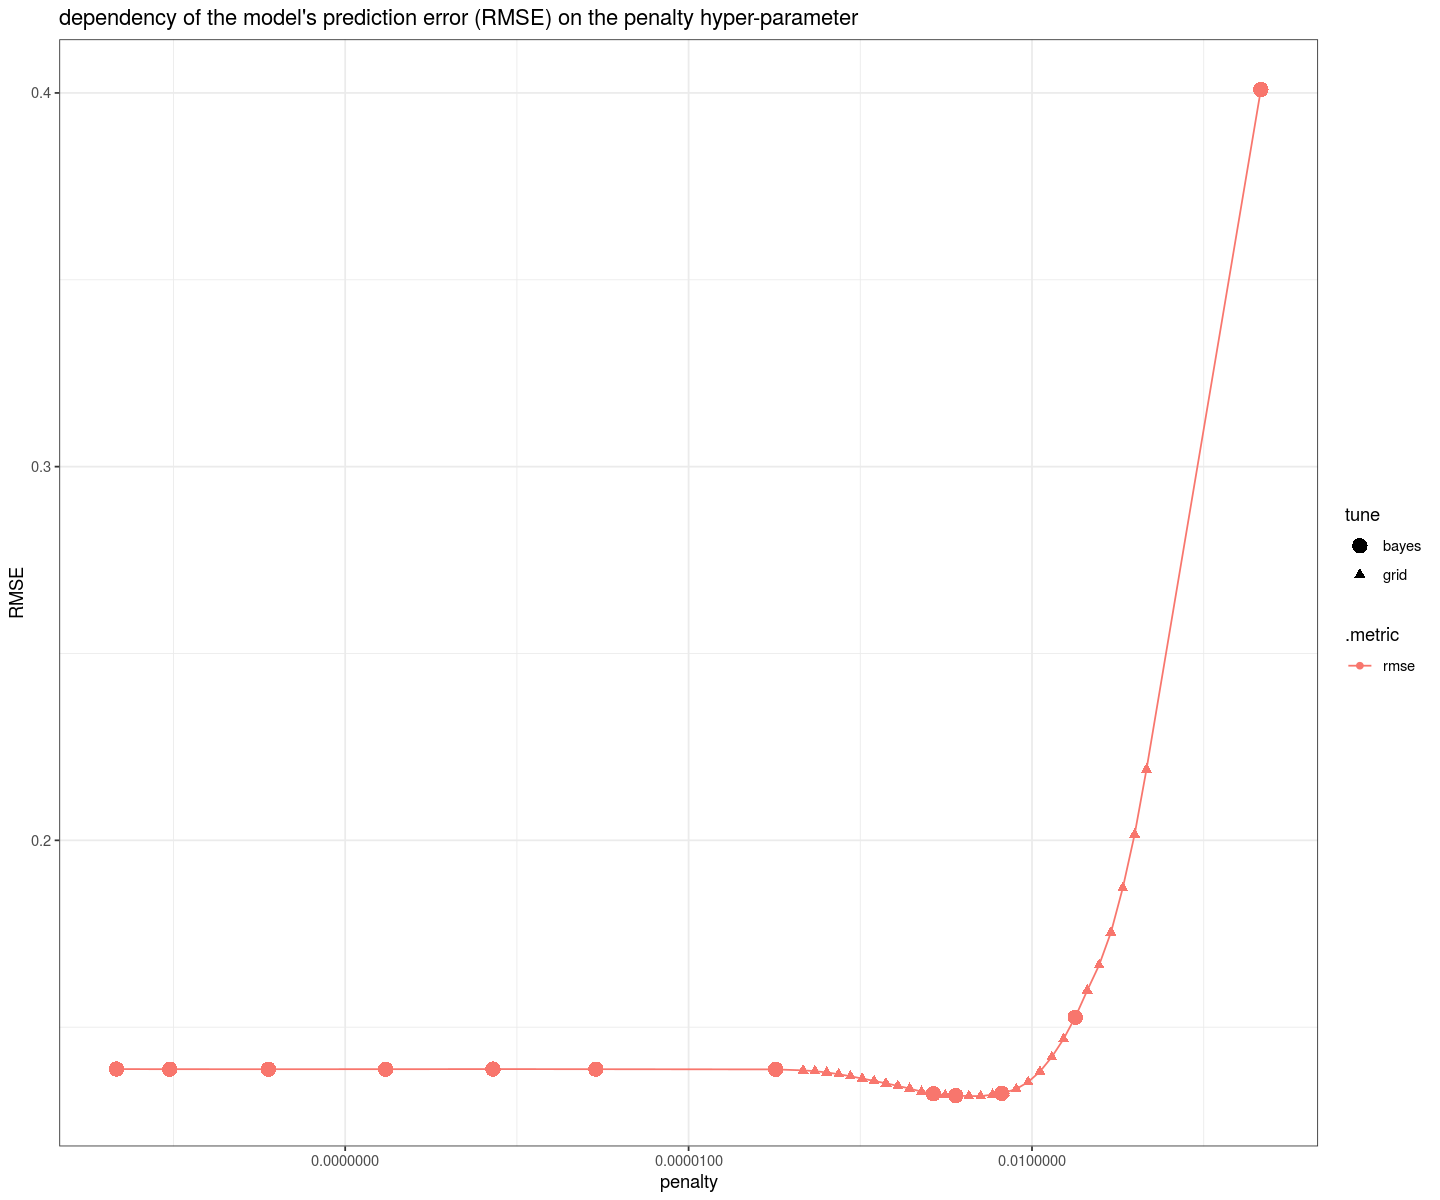

In [25]:
lasso_tune_bayes%>%
        collect_metrics()%>%
        select(-.iter)%>%
        add_column(tune='bayes')%>%
    rbind(lasso_tune_grid%>% 
          collect_metrics()%>%
          add_column(tune='grid'))%>%
    ggplot(aes(x = penalty, y = mean, color=.metric)) + 
      geom_point(aes(shape=tune, size=tune)) + 
      geom_line() + 
      ylab("RMSE") +
      scale_x_log10(labels = scales::label_number())+
      scale_size_manual(values=c(4,2))+
      ggtitle("dependency of the model's prediction error (RMSE) on the penalty hyper-parameter")


In [26]:
  lasso_tune_grid %>% show_best("rmse", n = 1) 


penalty     .metric .estimator mean      n std_err     .config              
1 0.003562248 rmse    standard   0.1315633 5 0.007879548 Preprocessor1_Model16

##### updating the workflow with the best performing model

In [27]:
lasso_best_params <- select_best(lasso_tune_grid, "rmse") #choose the hyperparameters that worked best
SalePrice_final_model <- finalize_model(Lasso_model, lasso_best_params) #update the hyper parameters of the model
Workflow_SalePrice_lasso   <- Workflow_SalePrice_lasso %>% update_model(SalePrice_final_model) # update the workflow with the updated model


## Model evaluation
| | |
|:-------------|:-------------|
|<img src="presentation/yardstick.png" alt="https://yardstick.tidymodels.org/" width="100"/>|The yardstick package provides us with functions to evaluate the performance of our model|

#### average Model  Error across all folds 
(see error used to find the best hyperparameters)


In [28]:
set.seed(42)
lasso_fit_rs <- 
    Workflow_SalePrice_lasso %>%
    fit_resamples(SalePrice_vfold)
collect_metrics(lasso_fit_rs)


.metric .estimator mean      n std_err     .config             
1 rmse    standard   0.1315633 5 0.007879548 Preprocessor1_Model1
2 rsq     standard   0.8934765 5 0.013150082 Preprocessor1_Model1

#### Model error on the validation data set

In [29]:
final_res_lasso <- last_fit(Workflow_SalePrice_lasso, split = data_split)
final_res_lasso$.metrics[[1]]


.metric .estimator .estimate .config             
1 rmse    standard   0.1160803 Preprocessor1_Model1
2 rsq     standard   0.9140708 Preprocessor1_Model1

#### Predicting values on the validation data set and Visualizing the prediction Error

In [30]:
SalePrice_lasso_fit  <- fit(Workflow_SalePrice_lasso, data = train_data)

pred_lasso <- 
  predict(SalePrice_lasso_fit, val_data) %>% 
  mutate(modelo = "regression",
         .pred = exp(.pred)) %>% 
  bind_cols(val_data %>% select(SalePrice))


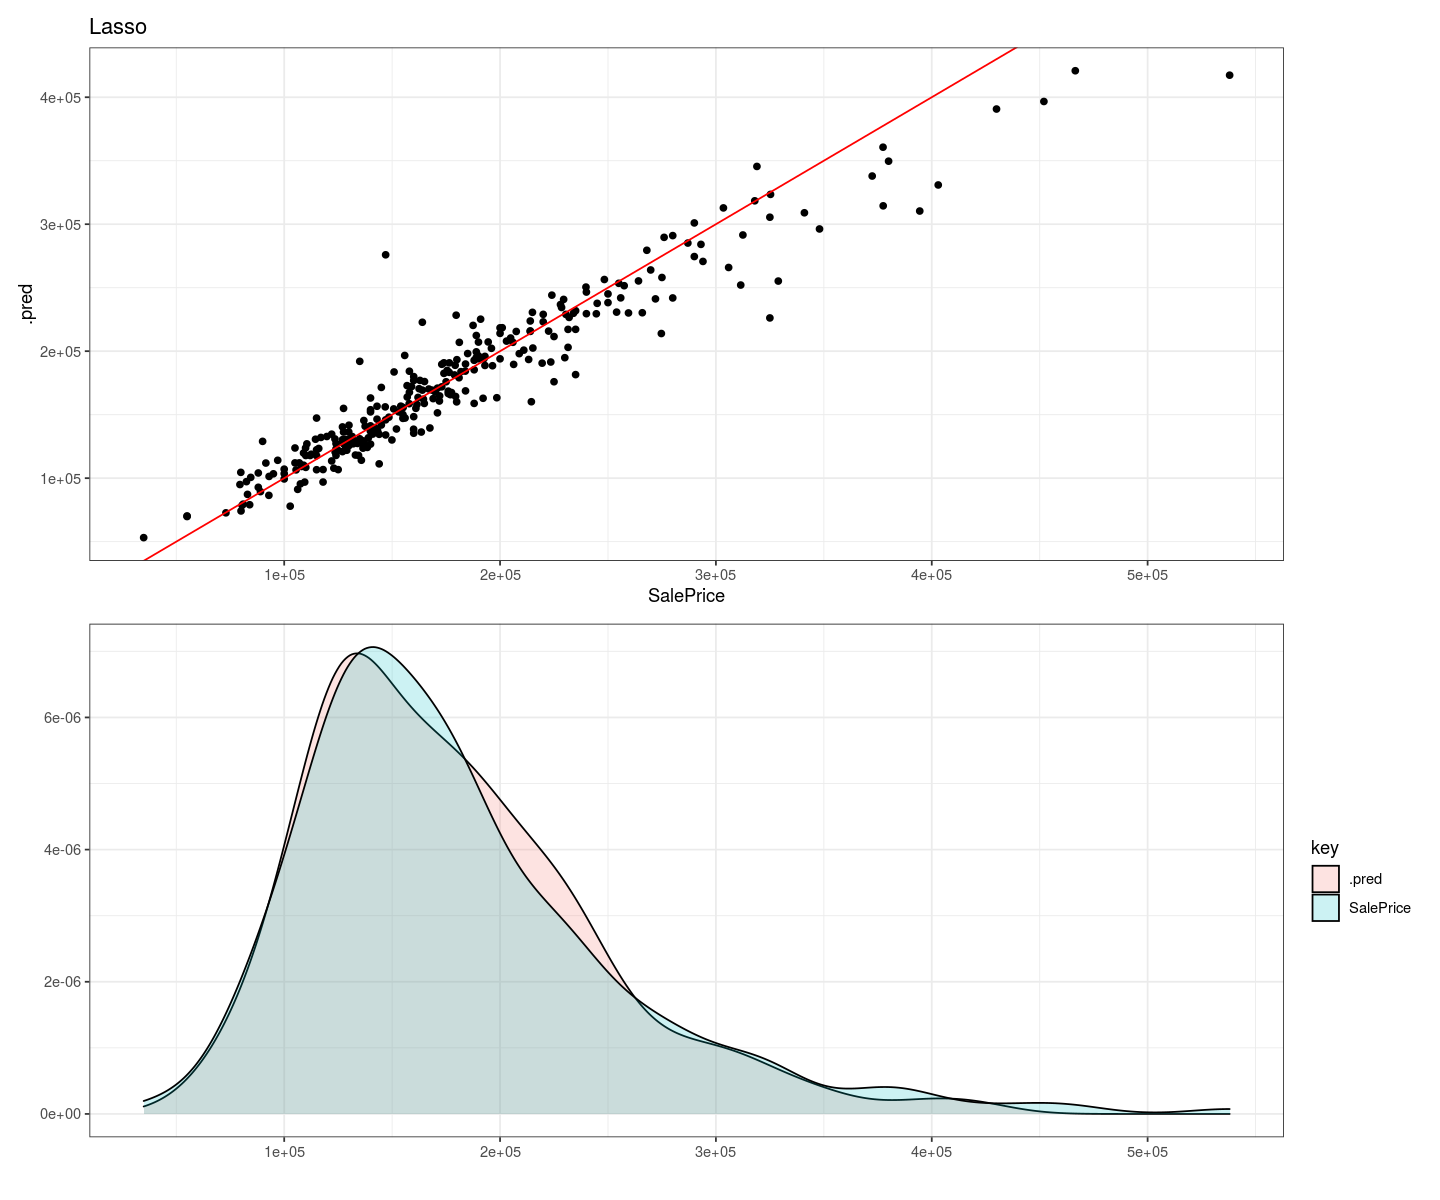

In [31]:

g3 <- 
  pred_lasso %>% 
  ggplot(aes(y = .pred, x = SalePrice))+
  geom_point()+ 
  geom_abline(intercept = 0, col = "red")+
  ggtitle('Lasso')


g4 <- 
  pred_lasso %>% 
  select(.pred, SalePrice) %>% 
  gather(key, value) %>% 
  ggplot(aes(x=value, volor = key, fill = key)) + 
  geom_density(alpha=.2)+ 
  labs(x = "", y = "")

g3/g4

#### Feature importance

In [35]:
tidy(SalePrice_lasso_fit)%>%arrange(desc(estimate))%>%head(n=10)

term                 estimate    penalty    
1  (Intercept)          11.93159783 0.003562248
2  Neighborhood_StoneBr  0.13868226 0.003562248
3  GrLivArea             0.12891412 0.003562248
4  Neighborhood_NridgHt  0.12048846 0.003562248
5  Neighborhood_Crawfor  0.10138341 0.003562248
6  Neighborhood_NoRidge  0.08927908 0.003562248
7  SaleType_New          0.08914019 0.003562248
8  OverallQual           0.06870660 0.003562248
9  Exterior1st_BrkFace   0.06851659 0.003562248
10 Neighborhood_Somerst  0.06475979 0.003562248

### Prediction on Test set and Writing the submission file

In [34]:
final_fit <-fit(Workflow_SalePrice_lasso, data = trainval_data)

pred_lasso <- 
  predict(final_fit, test_data) %>% 
  transmute(SalePrice = exp(.pred)) %>% # here we need to transform the prediction again, as we were working with logarithmic prices.
  bind_cols(test_data %>% select(Id)) %>% 
  write_csv("submission.csv")

# ... aand again!
### with XGBoost

### Model definition

In [36]:
Xgb_model <- 
  boost_tree(
        trees = tune(),      # the hyperparameters will be specified later, when we do hyperparameter tuning
        learn_rate = tune(), # but you can also set some fixed here.
        tree_depth = tune(),  
        min_n = tune(),      
        loss_reduction = tune(), 
        sample_size = tune(), 
        mtry = tune(), 
  ) %>% 
  set_mode("regression") %>% 
  set_engine("xgboost", nthread = ncores)

#This function only defines what type of model is being fit. 
#Once an engine is specified, the method to fit the model is also defined.

### Workflow setup

In [37]:
Workflow_SalePrice_xgb <- 
  workflow() %>% 
  add_model(Xgb_model) %>% 
  add_recipe(SalePrice_recipe)

### Hyperparameter tuning
To get a list of all hyperparameters and what they do, look here: https://parsnip.tidymodels.org/reference/boost_tree.html
or here: https://parsnip.tidymodels.org/reference/details_boost_tree_xgboost.html

In [38]:
xgboost_params <- parameters(
      trees(), 
      learn_rate(),
      tree_depth(), 
      min_n(), 
      loss_reduction(),
      sample_size = sample_prop(), 
      finalize(mtry(), train_data)  # the parameter range of mtry (how many features are chosen at random for each tree)
)                                   # depends on the data set (the number of features). With "finalize",
                                    # we let the function determine the upper bound given the data set.

xgboost_params <- xgboost_params %>% update(trees = trees(c(100, 500))) #parameter tuning ranges can also be updated later on.


-> we have many hyperparameters we want to optimize. Bayesian optimization is a better choice here.

When we tune the hyperparameters, we use 5-fold cross validation.
The model is trained on 4 of the 5 folds and evaluated on the 5th fold.
The algorithm then chooses the hyperparameters for which the model performs best across all folds.
What we need:
* the workflow containing the data transformation and information on target and feature variables as well as the model (workflow_SalePrice_xgb_model
* the cross-validation splitting of the data (SalePrice_vfold)
* the parameter ranges for the model (xgboost_params)
* for how many iterations we want to select different parameter sets
* the metrics that we want to use to evaluate the model
* the method for hyperparameter optimization

! There are 7 tuning parameters and 5 grid points were requested. This is
  likely to cause numerical issues in the first few search iterations.



❯  Generating a set of 5 initial parameter results

✓ Initialization complete



Optimizing rmse using the expected improvement



── Iteration 1 ──────────────────────────────────────────────────────────────────────────



i Current best:		rmse=0.2076 (@iter 0)

i Gaussian process model

! The Gaussian process model is being fit using 7 features but only has 5
  data points to do so. This may cause errors or a poor model fit.

✓ Gaussian process model

i Generating 5000 candidates

i Predicted candidates

i trees=263, learn_rate=0.0895, tree_depth=15, min_n=40, loss_reduction=0.51,
  sample_size=0.932, mtry=2

i Estimating performance

✓ Estimating performance

♥ Newest results:	rmse=0.1675 (+/-0.00725)



── Iteration 2 ──────────────────────────────────────────────────────────────────────────



i Current best:		rmse=0.1675 (@iter 1)

i 

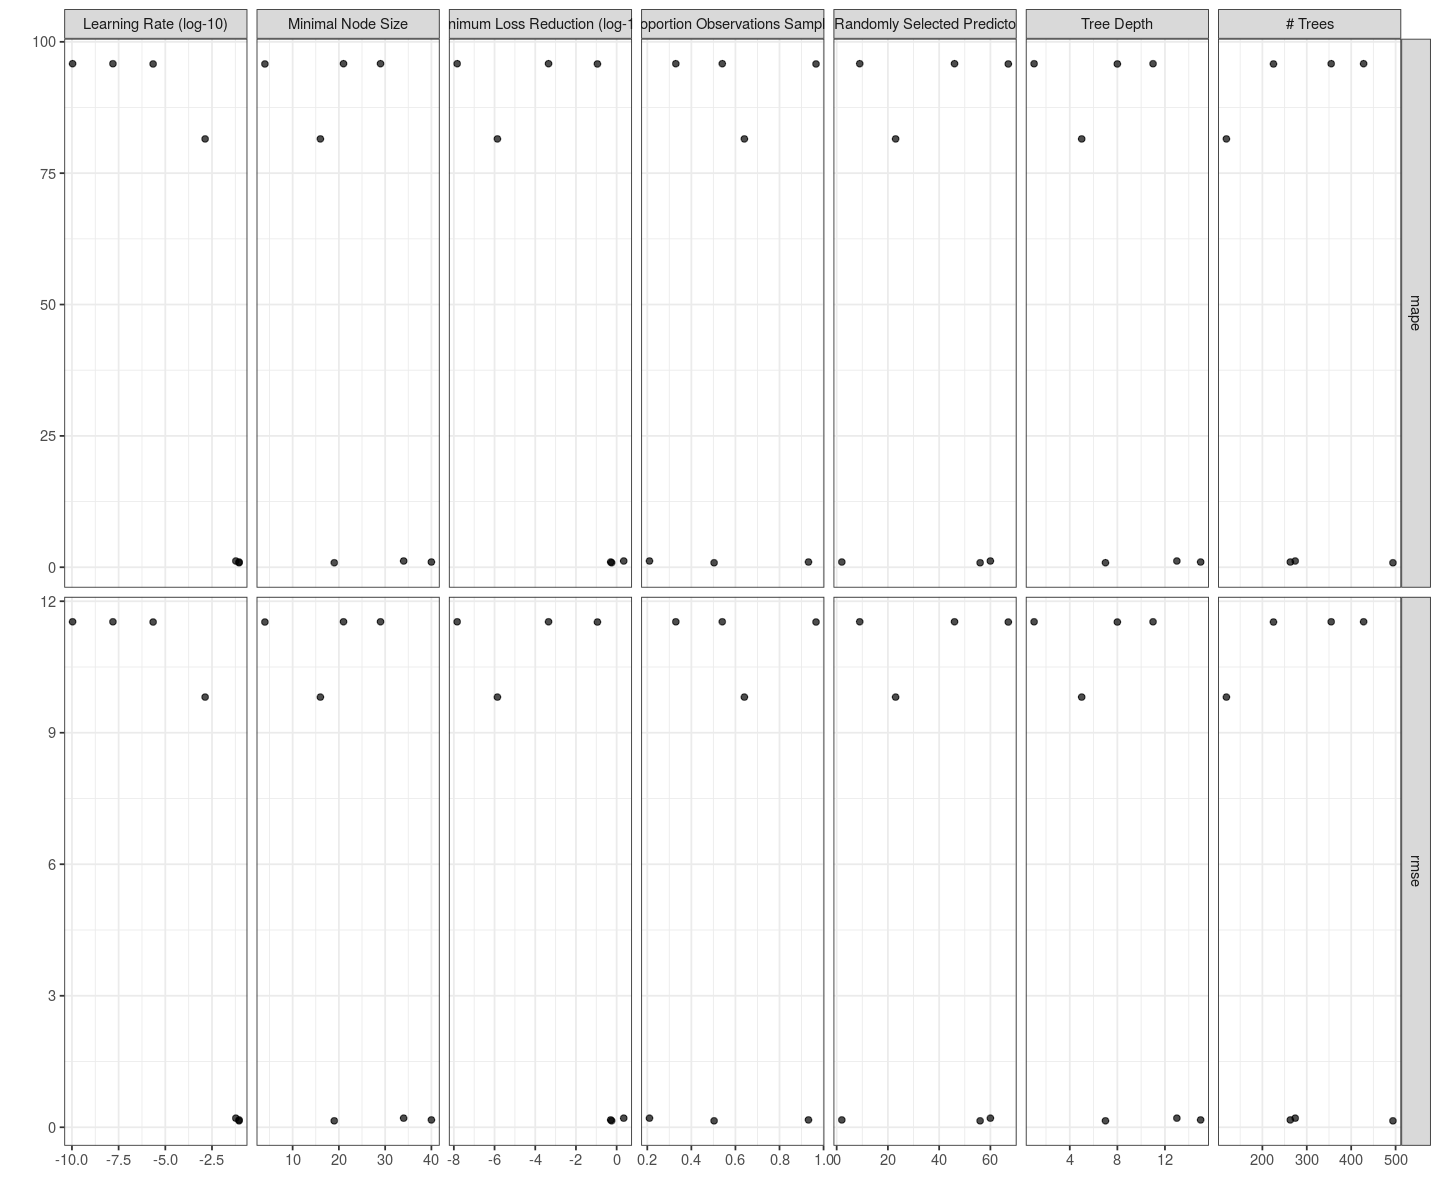

In [39]:

set.seed(42)
xgboost_tune <-
  Workflow_SalePrice_xgb %>%
  tune_bayes(
    resamples = SalePrice_vfold,
    param_info = xgboost_params,
    # initial = ?,
    iter = 2,#30  for testing purposes, use more iterations to get useful results 
    metrics = metric_set(rmse, mape),
    control = control_bayes(no_improve = 1,#5 # for testing purpose, be a bit more lenient with the tuner
                            save_pred = T, verbose = T)
  )

# doParallel::stopImplicitCluster()
autoplot(xgboost_tune)

In [41]:
xgb_best_params <- select_best(xgboost_tune, "mape") 
SalePrice_final_model <- finalize_model(Xgb_model, xgb_best_params)
Workflow_SalePrice_xgb    <- Workflow_SalePrice_xgb %>% update_model(SalePrice_final_model)


### Model evaluation

In [42]:
final_res_xgb <- last_fit(Workflow_SalePrice_xgb, split = data_split)
final_res_xgb$.metrics[[1]]


.metric .estimator .estimate .config             
1 rmse    standard   0.1384422 Preprocessor1_Model1
2 rsq     standard   0.8775126 Preprocessor1_Model1

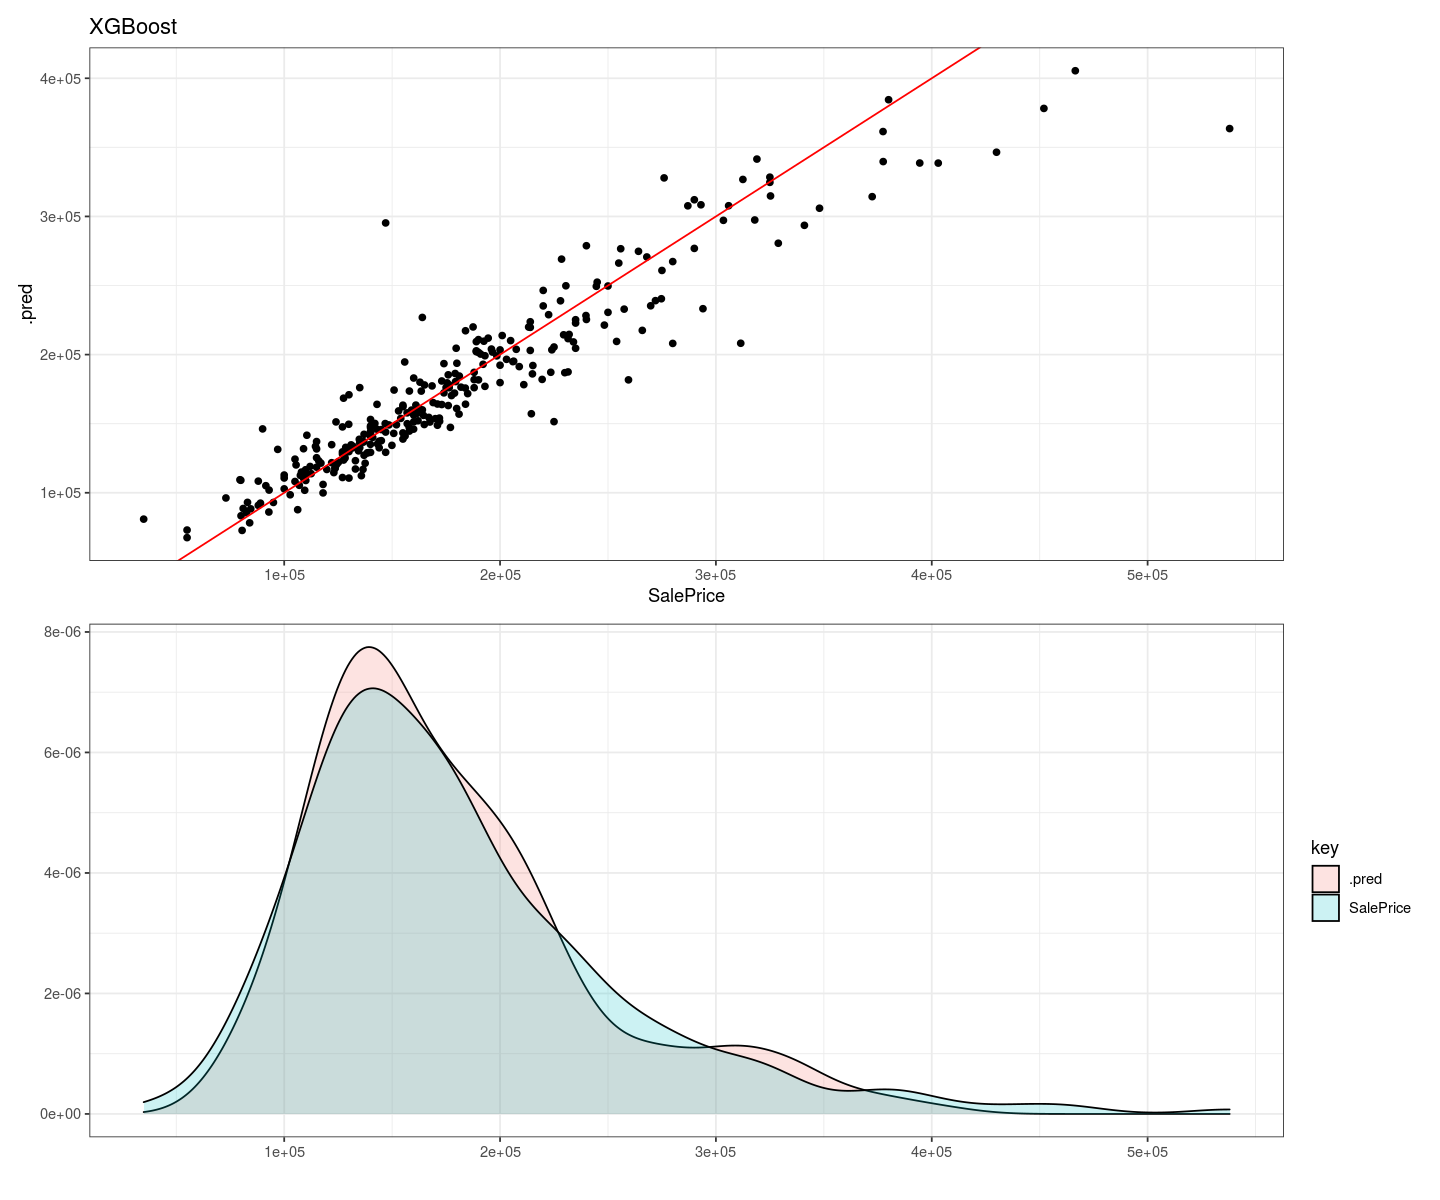

In [43]:
SalePrice_xgb_fit  <- fit(Workflow_SalePrice_xgb, data = train_data)

pred_xgb <- 
  predict(SalePrice_xgb_fit, val_data) %>% 
  mutate(modelo = "XGBoost",
         .pred = exp(.pred)) %>% 
  bind_cols(val_data %>% select(SalePrice))

g1 <- 
  pred_xgb %>% 
  ggplot(aes(y = .pred, x = SalePrice))+
  geom_point()+ 
  geom_abline(intercept = 0, col = "red")+
  ggtitle('XGBoost')


g2 <- 
  pred_xgb %>% 
  select(.pred, SalePrice) %>% 
  gather(key, value) %>% 
  ggplot(aes(x=value, volor = key, fill = key)) + 
  geom_density(alpha=.2)+ 
  labs(x = "", y = "")
g1/g2

### Feature importance


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




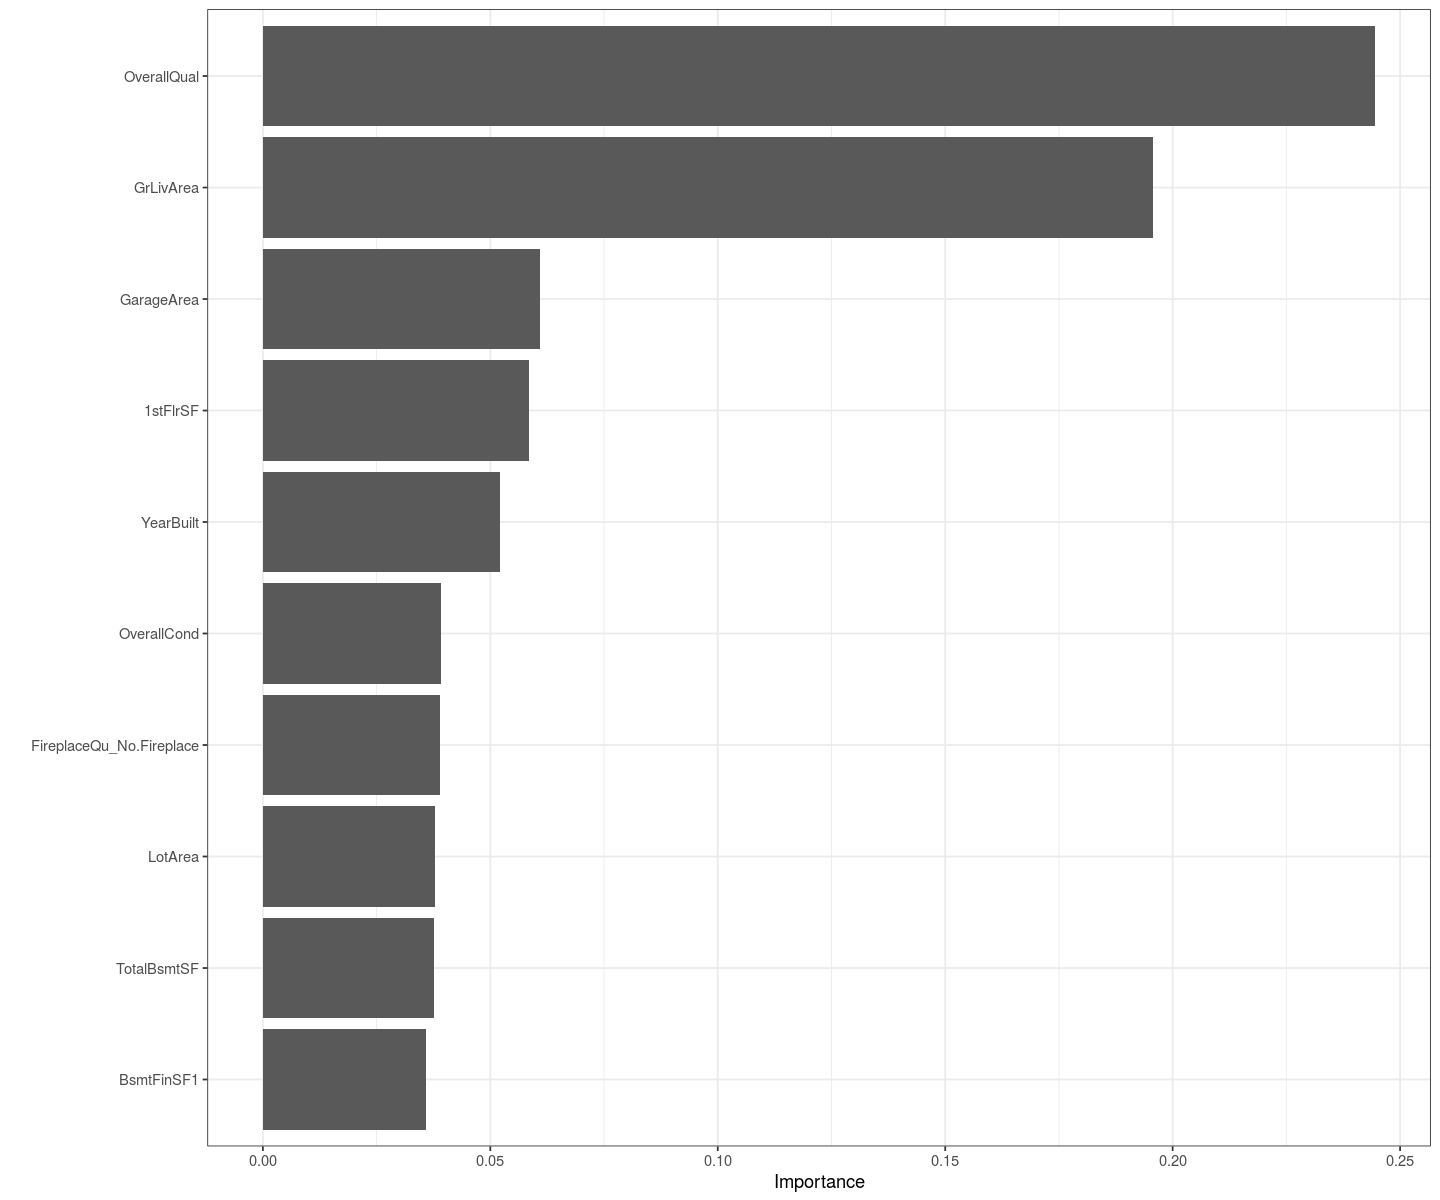

In [44]:
SalePrice_xgb_fit%>%
    extract_fit_parsnip() %>%
    vip()